In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import pingouin as pg
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from matplotlib.lines import Line2D
import matplotlib.lines as mlines
import math
import seaborn as sns
import random
import pickle

/Users/jialexu/opt/anaconda3/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/Users/jialexu/opt/anaconda3/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [7]:
## read human gwas database
df_human_gwas_cat = pd.read_csv('/Users/jialexu/Desktop/Project2GWAS-BehvaioralGenetics/experiments/Candidate_gene_prioritization/human_gwas_enrichment/human_gwas_catalog.tsv',
                sep='\t')

df_human_gwas_cat = df_human_gwas_cat.dropna(subset=['MAPPED_TRAIT_URI'])
df_human_gwas_cat

/Users/jialexu/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (9,11,12,23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,DATE ADDED TO CATALOG,PUBMEDID,FIRST AUTHOR,DATE,JOURNAL,LINK,STUDY,DISEASE/TRAIT,INITIAL SAMPLE SIZE,REPLICATION SAMPLE SIZE,...,PVALUE_MLOG,P-VALUE (TEXT),OR or BETA,95% CI (TEXT),PLATFORM [SNPS PASSING QC],CNV,MAPPED_TRAIT,MAPPED_TRAIT_URI,STUDY ACCESSION,GENOTYPING TECHNOLOGY
0,2017-08-10,28443625,Justice AE,2017-04-26,Nat Commun,www.ncbi.nlm.nih.gov/pubmed/28443625,"Genome-wide meta-analysis of 241,258 adults ac...",Waist circumference adjusted for BMI (adjusted...,"97,400 European ancestry women, 63,892 Europea...","21,496 European ancestry women, 24,385 Europea...",...,6.000000,(men),0.029300,[0.017-0.041] unit decrease,"Affymetrix, Illumina, Perlegen [up to 2800000]...",N,"smoking behavior, BMI-adjusted waist circumfer...","http://www.ebi.ac.uk/efo/EFO_0004318, http://w...",GCST004500,Genome-wide genotyping array
1,2017-08-10,28443625,Justice AE,2017-04-26,Nat Commun,www.ncbi.nlm.nih.gov/pubmed/28443625,"Genome-wide meta-analysis of 241,258 adults ac...",Waist circumference adjusted for BMI (adjusted...,"97,400 European ancestry women, 63,892 Europea...","21,496 European ancestry women, 24,385 Europea...",...,7.522879,(men),0.027500,[0.018-0.037] unit decrease,"Affymetrix, Illumina, Perlegen [up to 2800000]...",N,"smoking behavior, BMI-adjusted waist circumfer...","http://www.ebi.ac.uk/efo/EFO_0004318, http://w...",GCST004500,Genome-wide genotyping array
2,2017-08-10,28443625,Justice AE,2017-04-26,Nat Commun,www.ncbi.nlm.nih.gov/pubmed/28443625,"Genome-wide meta-analysis of 241,258 adults ac...",Waist circumference adjusted for BMI (adjusted...,"97,400 European ancestry women, 63,892 Europea...","21,496 European ancestry women, 24,385 Europea...",...,7.000000,(men),0.026800,[0.017-0.037] unit decrease,"Affymetrix, Illumina, Perlegen [up to 2800000]...",N,"smoking behavior, BMI-adjusted waist circumfer...","http://www.ebi.ac.uk/efo/EFO_0004318, http://w...",GCST004500,Genome-wide genotyping array
3,2017-08-10,28443625,Justice AE,2017-04-26,Nat Commun,www.ncbi.nlm.nih.gov/pubmed/28443625,"Genome-wide meta-analysis of 241,258 adults ac...",Waist circumference adjusted for BMI (adjusted...,"97,400 European ancestry women, 63,892 Europea...","21,496 European ancestry women, 24,385 Europea...",...,7.154902,(men),0.026400,[0.017-0.036] unit decrease,"Affymetrix, Illumina, Perlegen [up to 2800000]...",N,"smoking behavior, BMI-adjusted waist circumfer...","http://www.ebi.ac.uk/efo/EFO_0004318, http://w...",GCST004500,Genome-wide genotyping array
4,2017-08-10,28443625,Justice AE,2017-04-26,Nat Commun,www.ncbi.nlm.nih.gov/pubmed/28443625,"Genome-wide meta-analysis of 241,258 adults ac...",Waist circumference adjusted for BMI (adjusted...,"97,400 European ancestry women, 63,892 Europea...","21,496 European ancestry women, 24,385 Europea...",...,6.221849,(men),0.026000,[0.016-0.036] unit decrease,"Affymetrix, Illumina, Perlegen [up to 2800000]...",N,"smoking behavior, BMI-adjusted waist circumfer...","http://www.ebi.ac.uk/efo/EFO_0004318, http://w...",GCST004500,Genome-wide genotyping array
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398337,2020-11-30,32916098,Verweij N,2020-09-02,Cell Syst,www.ncbi.nlm.nih.gov/pubmed/32916098,The Genetic Makeup of the Electrocardiogram.,Electrocardiogram morphology (amplitude at tem...,"63,706 European and unknown ancestry individuals",NaN,...,37.045757,(328 ms),0.070677,[0.06-0.082] unit decrease,Affymetrix [10000000] (imputed),N,electrocardiography,http://www.ebi.ac.uk/efo/EFO_0004327,GCST010796,Genome-wide genotyping array
398338,2020-11-30,32916098,Verweij N,2020-09-02,Cell Syst,www.ncbi.nlm.nih.gov/pubmed/32916098,The Genetic Makeup of the Electrocardiogram.,Electrocardiogram morphology (amplitude at tem...,"63,706 European and unknown ancestry individuals",NaN,...,36.522879,(330 ms),0.070162,[0.059-0.081] unit decrease,Affymetrix [10000000] (imputed),N,electrocardiography,http://www.ebi.ac.uk/efo/EFO_0004327,GCST010796,Genome-wide genotyping array

In [3]:
## read gff3 data
df_gff3 = pd.read_csv('/Users/jialexu/Desktop/Project2GWAS-BehvaioralGenetics/experiments/Genome_annotation/20220706/Danio_rerio.GRCz11.105.chr.gff3.gz',skiprows=32, delimiter='\t', header = None)
df_gff3=df_gff3.dropna()

In [4]:
## import ld block data
import pickle
with open('/Users/jialexu/Desktop/Project2GWAS-BehvaioralGenetics/experiments/Gwas/data/LD_block/20220822/ld_block_info_20220822.pkl', 'rb') as f:
    df_ld_block = pickle.load(f)
df_ld_block = df_ld_block.loc[df_ld_block['peak_snp_log10P']>6.81]
df_ld_block

,SNPs_nearby,peak_snp_log10P,genes_in_small_block,small_block_start,small_block_end,small_block_size,genes_in_big_block,big_block_start,big_block_end,big_block_size,trait
Peak_SNP,,,,,,,,,,,
2:44880680,pos chr r2 -log10_P A...,6.893727,0 1 2 3 ...,43410268,45153038,1742770,0 1 2 3 ...,41760176,45159317,3399141,LDCI
5:3117060,pos chr r2 -log10_P A...,7.22189,0 1 2 3 4...,3110798,3148858,38060,0 1 2 3 4...,3064373,3148858,84485,LDCI
14:46314911,pos chr r2 -log10_P ...,7.0987,0 1 2 3 ...,46011134,46401191,390057,0 1 2 3 ...,45921676,46471177,549501,LDCI
17:33116150,pos chr r2 -log10_P ...,8.405968,0 1 2 3 ...,33017449,33214935,197486,0 1 2 3 ...,33000605,33298510,297905,LDCI
14:11581401,pos chr r2 -log10_P ...,6.922247,0 1 2 3 ...,11463826,13182363,1718537,0 1 2 3 ...,11422144,14795288,3373144,DET
17:13723952,pos chr r2 -log10_P ...,7.74426,0 1 2 3 ...,13691961,14019630,327669,0 1 2 3 ...,13691961,14019630,327669,DET
5:12451112,pos chr r2 -log10_P A...,8.695643,0 1 2 3 ...,12119942,13471630,1351688,0 1 2 3 ...,12119942,13471630,1351688,LTFDE
5:66959339,pos chr r2 -log10_P A...,8.158316,"Empty DataFrame Columns: [0, 1, 2, 3, 4, 5, 6,...",66832771,67001354,168583,0 1 2 3 ...,66820226,67144845,324619,LTFDE
2:48476767,pos chr r2 -log10_P A...,8.05454,0 1 2 3 ...,48309970,48580925,270955,0 1 2 3 ...,48309970,48589485,279515,DZTD


In [3]:
# import zebrafish and human orthologue
df_human_ortho = pd.read_csv('/Users/jialexu/Desktop/Project2GWAS-BehvaioralGenetics/experiments/Candidate_gene_prioritization/human_gwas_enrichment/human_orthos.txt',
                            sep='\t', skiprows=1, index_col=0)


In [4]:
## import zebrafish genes mapped by our GWAS
df_mapped_zebrafish_gene = pd.read_csv('/Users/jialexu/Desktop/Project2GWAS-BehvaioralGenetics/experiments/Gwas/data/LD_block/20220822/Candidate_gene_20220822.csv')
## find human orthoulogues for each mapped zebrafish genes
df_temp1 = df_human_ortho.loc[df_human_ortho['ZFIN Symbol'].isin(df_mapped_zebrafish_gene['Mapped_genes'])].set_index('ZFIN Symbol')['Human Symbol'].drop_duplicates()
df_temp2 = df_mapped_zebrafish_gene.drop_duplicates('Mapped_genes').set_index('Mapped_genes')
df_mapped_zebrafish_gene = pd.concat((df_temp1,df_temp2),axis=1).dropna()
df_mapped_zebrafish_gene.head()

,Human Symbol,Peak_snp,#NAME?,Trait,r2
trpc4apa,TRPC4AP,11:28576523,7.201903,T4_DEAD,0.6
pcdh18a,PCDH18,1:13180420,7.324098,T4_DET,0.5
nos1,NOS1,5:12451112,8.695643,LTFDE,0.6
plp1a,PLP1,14:13198899,7.111035,T2_LTFDE,0.6
atp1a2a,ATP1A2,2:44880680,6.893727,LDCI,0.6


In [5]:
def func1(gene):
    
    def genesymbol2gwas(gene):
        url = "https://www.ebi.ac.uk/gwas/api/search/downloads?q=ensemblMappedGenes:{}&pvalfilter=&orfilter=&betafilter=&datefilter=&genomicfilter=&genotypingfilter[]=&traitfilter[]=&dateaddedfilter=&facet=association&efo=true"
        return pd.read_csv(url.format(gene), sep='\t')

    def subfunc1(x):
        z = []
        for y in x.split(','):
            y=y.split('/')[-1]
            if y not in z:
                z.append(y)
        return z
    
    def flatten(l):
        return [item for sublist in l for item in sublist]
    
    df = genesymbol2gwas(gene)
    
    efolist = list(df['MAPPED_TRAIT_URI'].dropna().apply(lambda x: subfunc1(x)))
    annotationlist = df['MAPPED_TRAIT'].values.tolist()
    return [list(set(flatten(efolist))), annotationlist]


In [6]:
##find human gwas efo for all gwas mapped zebrafish genes
df_mapped_zebrafish_gene['Mapped_human_gwas_traits_efo'] = df_mapped_zebrafish_gene['Human Symbol'].apply(lambda x: func1(x)[0])
df_mapped_zebrafish_gene['Mapped_human_gwas_traits'] = df_mapped_zebrafish_gene['Human Symbol'].apply(lambda x: func1(x)[1])
df_mapped_zebrafish_gene

,Human Symbol,Peak_snp,#NAME?,Trait,r2,Mapped_human_gwas_traits_efo,Mapped_human_gwas_traits
trpc4apa,TRPC4AP,11:28576523,7.201903,T4_DEAD,0.6,"[EFO_0004536, EFO_0004279, EFO_0004527, EFO_00...","[feeling nervous measurement, venous thromboem..."
pcdh18a,PCDH18,1:13180420,7.324098,T4_DET,0.5,"[EFO_0006336, EFO_0004918, EFO_0009931, EFO_00...","[systolic blood pressure, diastolic blood pres..."
nos1,NOS1,5:12451112,8.695643,LTFDE,0.6,"[EFO_0005842, EFO_0007869, EFO_0005406, EFO_00...","[schizophrenia, depressive symptom measurement..."
plp1a,PLP1,14:13198899,7.111035,T2_LTFDE,0.6,[],[]
atp1a2a,ATP1A2,2:44880680,6.893727,LDCI,0.6,"[EFO_0004327, GO_0097333, EFO_0004305, EFO_000...","[lipid measurement, educational attainment, el..."
...,...,...,...,...,...,...,...
pes,PES1,5:12451112,8.695643,LTFDE,0.6,"[EFO_0007874, MONDO_0005090, EFO_0007937, EFO_...","[schizophrenia, 3-methyl-2-oxobutyrate measure..."
snai1a,SNAI1,11:28576523,7.201903,T4_DEAD,0.6,"[EFO_0004339, EFO_0007578, EFO_0004529, EFO_00...","[body height, blood copper measurement, emphys..."
raf1a,RAF1,23:4911792,7.375745,T4_LTFDE,0.6,"[MONDO_0004979, MONDO_0100096, EFO_0003095, EF...","[total cholesterol measurement, total choleste..."
opn1lw1,OPN1LW,11:28576523,7.201903,T4_DEAD,0.6,"[EFO_0004587, EFO_0007015]",[3-hydroxy-1-methylpropylmercapturic acid meas...


In [7]:
## save the results in csv and pkl file
output_dir = '/Users/jialexu/Desktop/Project2GWAS-BehvaioralGenetics/experiments/Gwas/data/LD_block/20220822/'
filename = 'Candidate_gene_with_human_gwas_traits.csv'
df_mapped_zebrafish_gene.to_csv(output_dir+filename)
import pickle
with open('/Users/jialexu/Desktop/Project2GWAS-BehvaioralGenetics/experiments/Gwas/data/LD_block/20220822/df_mapped_zebrafish_gene.pkl', 'wb') as outp:
    pickle.dump(df_mapped_zebrafish_gene, outp, pickle.HIGHEST_PROTOCOL)
    

In [45]:
## get the human GWAS efo and efo traits for all zebrafish gene with human orthologues

df_all_zgene_human_ortho = df_human_ortho.drop_duplicates('Human Symbol')[['ZFIN Symbol', 'Human Symbol']]

df_all_zgene_human_ortho['Mapped_human_gwas_traits_efo'] = df_all_zgene_human_ortho['Human Symbol'].apply(lambda x: func1(x)[0])

df_all_zgene_human_ortho['Mapped_human_gwas_traits'] = df_all_zgene_human_ortho['Human Symbol'].apply(lambda x: func1(x)[1])



    

In [98]:
import pickle
with open('/Users/jialexu/Desktop/Project2GWAS-BehvaioralGenetics/experiments/Gwas/learning/LD_block/20221012/all_zgene_human_ortho_gwas.pkl', 'wb') as outp:
    pickle.dump(df_all_zgene_human_ortho, outp, pickle.HIGHEST_PROTOCOL)

### Group zebrafish genes based on human GWAS Catalog information

In [5]:
with open('/Users/jialexu/Desktop/Project2GWAS-BehvaioralGenetics/experiments/Gwas/data/LD_block/20220822/df_mapped_zebrafish_gene.pkl', 'rb') as f:
    df_mapped_zebrafish_gene = pickle.load(f)

In [18]:
df_mapped_zebrafish_gene.to_csv("/Users/jialexu/Desktop/Project2GWAS-BehvaioralGenetics/experiments/Gwas/data/LD_block/20220822/df_mapped_zebrafish_gene.csv")




In [ ]:
## read human gwas database
df_human_gwas_cat = pd.read_csv('/Users/jialexu/Desktop/Project2GWAS-BehvaioralGenetics/experiments/Candidate_gene_prioritization/human_gwas_enrichment/human_gwas_catalog.tsv',
                sep='\t')

df_human_gwas_cat = df_human_gwas_cat.dropna(subset=['MAPPED_TRAIT_URI'])
df_human_gwas_cat

In [8]:
## get a list of all the EFOs mapped by zebrafish candidate genes
gene_num_list = []
gene_list = []
efo_list = list(set(df_mapped_zebrafish_gene['Mapped_human_gwas_traits_efo'].sum()))
for efo in efo_list:
    df = df_mapped_zebrafish_gene.loc[df_mapped_zebrafish_gene['Mapped_human_gwas_traits_efo'].apply(lambda x:efo in x)]
    gene_num = df.shape[0]
    gene_list.append(df['Human Symbol'].to_list())
    gene_num_list.append(gene_num)
df_efo_count = pd.DataFrame({'EFO':efo_list, 'Gene_num':gene_num_list, 'H_genes':gene_list})

## develop a function to get annotation information for each efo from the above matrix
def EFO_annotation(efo):   
    def list_index(target_list, efo):
        target_list = target_list.split(',')
        for i, s in enumerate(target_list):
            if efo in s:
                return i
    def get_trait(trait_list, index):
        return trait_list.split(",")[index]
    df_temp = df_human_gwas_cat.loc[df_human_gwas_cat['MAPPED_TRAIT_URI'].str.contains(efo)][['MAPPED_TRAIT_URI', 'MAPPED_TRAIT']].drop_duplicates()
    if df_temp.shape[0]>0:
        df_temp['trait_index'] = df_temp['MAPPED_TRAIT_URI'].apply(lambda x: list_index(x, efo)) 
        annotation = df_temp.apply(lambda x: get_trait(x.MAPPED_TRAIT, x.trait_index),axis=1).str.strip().drop_duplicates()
        annotation = list(set(annotation.str.cat(sep=',').split(',')))
        return annotation

df_efo_count['annotation'] = df_efo_count['EFO'].apply(lambda x: EFO_annotation(x))
df_efo_count


,EFO,Gene_num,H_genes,annotation
0,EFO_0008404,2,"[CCL19, PDE4D]",[susceptibility to mumps measurement]
1,EFO_0008398,1,[SSBP3],[T wave morphology measurement]
2,EFO_0008112,2,"[PPP4R4, SERPINA10]",[dual specificity mitogen-activated protein ki...
3,MONDO_0002009,2,"[LRFN5, FAM120A]",[major depressive disorder]
4,EFO_0007680,1,[PCDH10],[gait measurement]
...,...,...,...,...
965,EFO_0020944,6,"[MAFB, UBE2L3, MTTP, SYN2, COLEC11, POC5]",[cholesteryl esters:total lipids ratio]
966,EFO_0004208,1,[FASLG],[Vitiligo]
967,EFO_0009695,5,"[ELOVL7, NDUFAF2, MEF2C, GRK4, SMIM15]",[household income]
968,EFO_0004341,6,"[VCAN, MEF2C, CADM3, ANKDD1B, DNAJC27, ADAMTS3]",[body fat distribution]


In [9]:
##develop a function to summarize human genes associated with efo belonging to a specific category
def func1(df_efo_count, trait_category):
    
    pyd = pd.read_excel('/Users/jialexu/Desktop/Project2GWAS-BehvaioralGenetics/experiments/Gwas/data/LD_block/20220822/OLS_trait.xlsx',
                       header=None, sheet_name=trait_category)
    pyd = pd.Series(pyd[0].apply(lambda x: [x]))
    pyd_mapped = df_efo_count.loc[df_efo_count.set_index('annotation').index.isin(pyd)]
    pyd_mapped = pyd_mapped[['annotation', 'Gene_num', 'H_genes']]
    pyd_mapped = pyd_mapped.sort_values('Gene_num',ascending=False)
    pyd_mapped.rename(columns = {'annotation':'Pyschiatric_disease'}, inplace=True)

    pyd_unmapped = pyd.loc[~pyd.isin(pyd_mapped['Pyschiatric_disease'])].reset_index()
    pyd_unmapped['Gene_num'] = 0
    pyd_unmapped['H_genes'] = np.nan
    pyd_unmapped = pyd_unmapped.iloc[:, 1:]
    pyd_unmapped.columns = ['Pyschiatric_disease', 'Gene_num', 'H_genes']

    df_res_pyd = pd.concat((pyd_mapped, pyd_unmapped))
    return df_res_pyd

In [10]:
df_efo_psy = func1(df_efo_count, 'psychiatric_disorder')
df_efo_mp = func1(df_efo_count, 'mental_process')
df_efo_ndg= func1(df_efo_count, 'neurodegenerative_disease')
df_efo_epi= func1(df_efo_count, 'epilepsy')
df_efo_cardio = func1(df_efo_count, 'cardio')

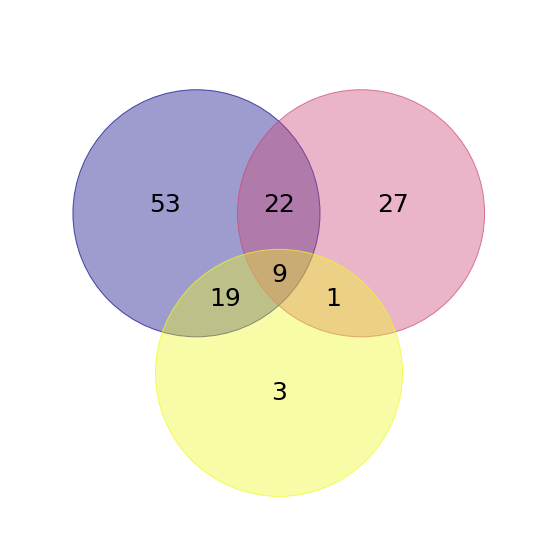

In [30]:
f, ax = plt.subplots(1,1, figsize=(10,10))
dic = {'psychiatric disease':set(df_efo_psy['H_genes'].dropna().sum()),
       'mental process':set(df_efo_mp['H_genes'].dropna().sum()),
       'neurodegenerative disease':set(df_efo_ndg['H_genes'].dropna().sum())}
from venn import venn
v= venn(dic, cmap='plasma', legend_loc=[0.5, 0],ax=ax, fontsize=25)

ax.legend("",frameon=False)
plt.show()

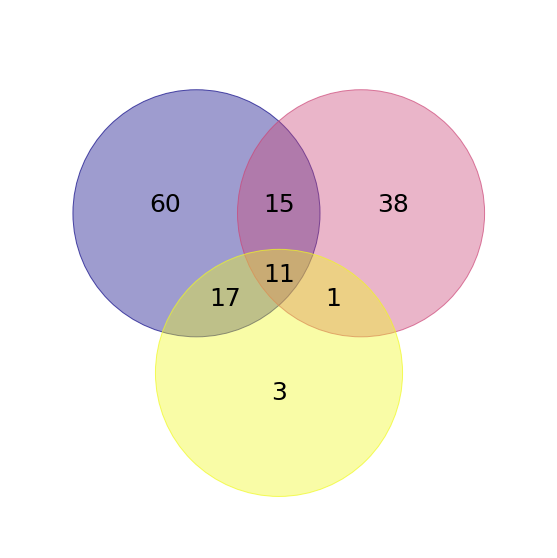

In [13]:
f, ax = plt.subplots(1,1, figsize=(10,10))
dic = {'psychiatric disease':set(df_efo_psy['H_genes'].dropna().sum()),
       'cardio':set(df_efo_cardio['H_genes'].dropna().sum()),
       'neurodegenerative disease':set(df_efo_ndg['H_genes'].dropna().sum())}
from venn import venn
v= venn(dic, cmap='plasma', legend_loc=[0.5, 0],ax=ax, fontsize=25)

ax.legend("",frameon=False)
plt.show()

In [14]:
df_GO = pd.read_csv('/Users/jialexu/Desktop/Project2GWAS-BehvaioralGenetics/experiments/GO_enrichment_analysis/MB_gene_gProfiler.csv')


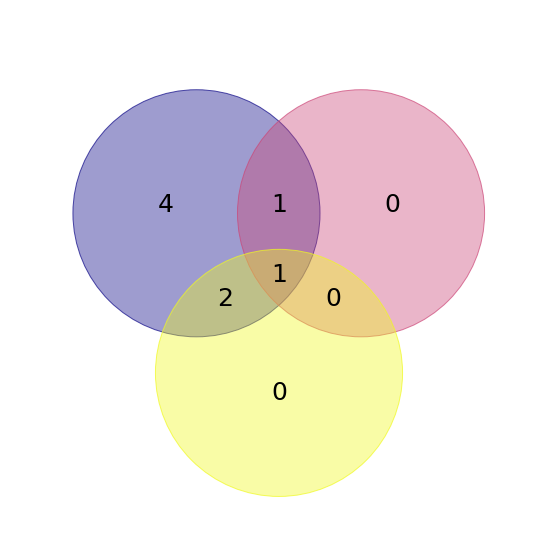

In [15]:
GO='learning or memory'
set1 = set((df_GO.loc[df_GO['term_name']==GO].iloc[0,9]).split(','))&\
set(df_efo_psy['H_genes'].dropna().sum())
set2 = set((df_GO.loc[df_GO['term_name']==GO].iloc[0,9]).split(','))&\
set(df_efo_cardio['H_genes'].dropna().sum())
set3 = set((df_GO.loc[df_GO['term_name']==GO].iloc[0,9]).split(','))&\
set(df_efo_ndg['H_genes'].dropna().sum())
f, ax = plt.subplots(1,1, figsize=(10,10))
dic = {'psychiatric disease':set1,
       'cardio':set2,
       'neurodegenerative disease':set3}
from venn import venn
v= venn(dic, cmap='plasma', legend_loc=[0.5, 0],ax=ax, fontsize=25)

ax.legend("",frameon=False)
plt.show()

In [29]:
len(set(dic['SCZ']|dic['UD']|dic['ADHD']|dic['SBA']|dic['ASD']))

71

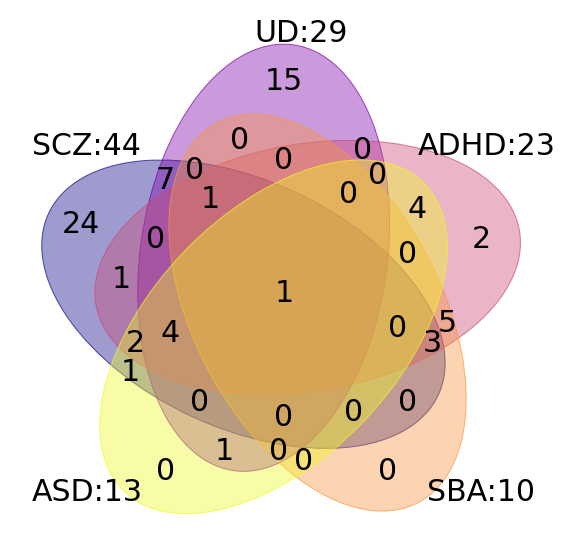

In [12]:
## make a venn diagram for genes mapped for different diseases
df_plot = df_efo_psy.copy()
disease_dic = {'schizophrenia':'SCZ', 
               'unipolar depression':'UD', 
               'attention deficit hyperactivity disorder':'ADHD',
              'substance abuse':'SBA',
              'autism spectrum disorder':'ASD'}
df_plot['Pyschiatric_disease'] = df_plot['Pyschiatric_disease'].apply(lambda x: x[0])
dic = {}
f, ax = plt.subplots(1,1, figsize=(10,10))
for disease in disease_dic.keys():
    gene_list = df_plot.loc[df_plot['Pyschiatric_disease']==disease].iloc[0, 2]
    label = disease_dic[disease]
    dic.update({label:set(gene_list)})
from venn import venn
v= venn(dic, cmap='plasma', legend_loc=[0.5, 0],ax=ax, fontsize=30)
ax.text(0,0.75,list(disease_dic.values())[0]+":"+str(len(list(dic.values())[0])), size=30)
ax.text(0.45,0.98,list(disease_dic.values())[1]+":"+str(len(list(dic.values())[1])), size=30)
ax.text(0.78,0.75,list(disease_dic.values())[2]+":"+str(len(list(dic.values())[2])), size=30)
ax.text(0.8,0.05,list(disease_dic.values())[3]+":"+str(len(list(dic.values())[3])), size=30)
ax.text(0,0.05,list(disease_dic.values())[4]+":"+str(len(list(dic.values())[4])), size=30)
ax.legend("", frameon=False)
plt.show()

In [15]:
## get a list of all the EFOs mapped by genes orthologues to all zebrafish genes
with open('/Users/jialexu/Desktop/Project2GWAS-BehvaioralGenetics/experiments/Gwas/learning/LD_block/20221012/all_zgene_human_ortho_gwas.pkl', 'rb') as f:
    df_all_zgene_human_ortho = pickle.load(f)
gene_num_list = []
gene_list = []
efo_list = list(set(df_all_zgene_human_ortho['Mapped_human_gwas_traits_efo'].sum()))
for efo in efo_list:
    df = df_all_zgene_human_ortho.loc[df_all_zgene_human_ortho['Mapped_human_gwas_traits_efo'].apply(lambda x:efo in x)]
    gene_num = df.shape[0]
    gene_list.append(df['Human Symbol'].to_list())
    gene_num_list.append(gene_num)
df_efo_count_all_zgene = pd.DataFrame({'EFO':efo_list, 'Gene_num':gene_num_list, 'H_genes':gene_list})

## develop a function to get annotation information for each efo from the above matrix
def EFO_annotation(efo):   
    def list_index(target_list, efo):
        target_list = target_list.split(',')
        for i, s in enumerate(target_list):
            if efo in s:
                return i
    def get_trait(trait_list, index):
        return trait_list.split(",")[index]
    df_temp = df_human_gwas_cat.loc[df_human_gwas_cat['MAPPED_TRAIT_URI'].str.contains(efo)][['MAPPED_TRAIT_URI', 'MAPPED_TRAIT']].drop_duplicates()
    if df_temp.shape[0]>0:
        df_temp['trait_index'] = df_temp['MAPPED_TRAIT_URI'].apply(lambda x: list_index(x, efo)) 
        annotation = df_temp.apply(lambda x: get_trait(x.MAPPED_TRAIT, x.trait_index),axis=1).str.strip().drop_duplicates()
        annotation = list(set(annotation.str.cat(sep=',').split(',')))
        return annotation

df_efo_count_all_zgene['annotation'] = df_efo_count_all_zgene['EFO'].apply(lambda x: EFO_annotation(x))
df_efo_count_all_zgene


,EFO,Gene_num,H_genes,annotation
0,EFO_0011005,6,"[ZFAND2A, SLC45A2, PRKAG2, CNTNAP2, UNCX, SHRO...",[urea measurement]
1,EFO_0010607,1,[CD40],[tumor necrosis factor]
2,EFO_0004995,227,"[IGF2BP3, BDNF, ETV6, SMAD6, VCAN, PHC2, FSHR,...",[lean body mass]
3,EFO_0004611,832,"[PBX4, COL11A2, INHBA, HOXB7, STX1B, BDNF, FN1...",[low density lipoprotein cholesterol measurement]
4,HP_0011142,16,"[HIP1, CRYAA, BICRA, PDE10A, KCNAB1, LUZP2, CO...",[Age-related nuclear cataract]
...,...,...,...,...
3431,EFO_0009103,3,"[LPGAT1, NEK2, BBS4]",[theory of mind measurement]
3432,HP_0001822,27,"[SLIT3, MYO1B, RFLNA, ARHGEF1, CDK8, SOX2, MTR...",[Hallux valgus]
3433,EFO_0010434,6,"[TMEM258, RGS2, EDIL3, AHCTF1, MYRF, PTPRT]",[triacylglycerol 56:7 measurement]
3434,EFO_0010729,9,"[FAM76B, CADM2, DIPK2A, TMEFF1, FKRP, SLC1A5, ...",[sun exposure measurement]


In [23]:
df_pys_all_zgene = func1(df_efo_count_all_zgene,'psychiatric_disorder')
df_mp_all_zgene = func1(df_efo_count_all_zgene,'mental_process')
df_ndg_all_zgene  = func1(df_efo_count_all_zgene, 'neurodegenerative_disease')
df_epi_all_zgene  = func1(df_efo_count_all_zgene, 'epilepsy')
df_cardio_all_zgene = func1(df_efo_count_all_zgene, 'cardio')

In [17]:
len(set(df_pys_all_zgene['H_genes'].dropna().sum()))

3857

In [19]:
len(set(df_mp_all_zgene['H_genes'].dropna().sum()))

1791

In [20]:
len(set(df_ndg_all_zgene['H_genes'].dropna().sum()))

1593

In [22]:
len(set(df_epi_all_zgene['H_genes'].dropna().sum()))

44

In [24]:
len(set(df_cardio_all_zgene['H_genes'].dropna().sum()))

2333

In [50]:
df_temp1 = df_efo_count.set_index('EFO')
df_temp2 = df_efo_count_all_zgene.set_index('EFO')
overlapped_efo =  df_temp1.index.intersection(df_temp2.index)
df_enrich_test_input = pd.concat((df_temp1.loc[overlapped_efo], df_temp2.loc[overlapped_efo]['Gene_num']),axis=1)
df_enrich_test_input.columns = ['mapped_gene_num', 'H_genes', 'annotation', 'total_gene_num']
df_enrich_test_input = df_enrich_test_input[['mapped_gene_num', 'total_gene_num','H_genes', 'annotation']]
df_enrich_test_input

,mapped_gene_num,total_gene_num,H_genes,annotation
EFO,,,,
EFO_0004220,1,11,[ITPA],[chronic hepatitis C virus infection]
EFO_0010980,1,4,[COL21A1],[3-aminoisobutyrate measurement]
EFO_0010228,4,94,"[ELOVL7, NDUFAF2, ERCC8, PES1]",[phosphatidylethanolamine measurement]
EFO_0004573,1,7,[EDIL3],[chemerin measurement]
EFO_0000319,5,305,"[PCDH18, MAFB, TMEM161B, DNAJC27, NGF]",[cardiovascular disease]
...,...,...,...,...
EFO_0006334,2,38,"[COMMD1, B3GNT2]",[total iron binding capacity]
EFO_0006329,1,54,[UNC5A],[response to citalopram]
Orphanet_2445,5,39,"[NUP210, KCNS3, KAZN, IQSEC1, KLHL29]",[Conotruncal heart malformations]


In [53]:
from scipy.stats import fisher_exact
def fisher_test(x,y):
    odds, pval = fisher_exact([[338-x, x], [13585-y, y]])
    return pval
df_enrich_test_input['pval'] = df_enrich_test_input.apply(lambda x: fisher_test(x['mapped_gene_num'],x['total_gene_num']),axis=1)

In [60]:
pyd = pd.read_excel('/Users/jialexu/Desktop/Project2GWAS-BehvaioralGenetics/experiments/Gwas/learning/LD_block/20221012/Psychiatric_disorder_list.xlsx',
                       header=None)
pyd = pd.Series(pyd[0].apply(lambda x: [x]))
pyd_mapped = df_enrich_test_input.loc[df_enrich_test_input.set_index('annotation').index.isin(pyd)]
pyd_mapped.loc[pyd_mapped['pval']<0.05]

,mapped_gene_num,total_gene_num,H_genes,annotation,pval
EFO,,,,,
EFO_1001892,3,15,"[LRFN5, LHX8, FAM120A]",[generalized anxiety disorder],0.008827
EFO_0020103,3,23,"[JUN, SSBP3, PLK2]",[childhood gender nonconformity],0.024392
EFO_0001358,5,68,"[NOS1, MON1B, KAZN, LRFN5, AKT3]",[post-traumatic stress disorder],0.032128


### Analysis for individual LD blocks

In [85]:
def one_block_efo(peak_snp, trait):
    def func1(gene):
    
        def genesymbol2gwas(gene):
            url = "https://www.ebi.ac.uk/gwas/api/search/downloads?q=ensemblMappedGenes:{}&pvalfilter=&orfilter=&betafilter=&datefilter=&genomicfilter=&genotypingfilter[]=&traitfilter[]=&dateaddedfilter=&facet=association&efo=true"
            return pd.read_csv(url.format(gene), sep='\t')

        def subfunc1(x):
            z = []
            for y in x.split(','):
                y=y.split('/')[-1]
                if y not in z:
                    z.append(y)
            return z

        def flatten(l):
            return [item for sublist in l for item in sublist]

        df = genesymbol2gwas(gene)

        efolist = list(df['MAPPED_TRAIT_URI'].dropna().apply(lambda x: subfunc1(x)))
        annotationlist = df['MAPPED_TRAIT'].values.tolist()
        return [list(set(flatten(efolist))), annotationlist]
    
    df_one_ld = pd.read_csv('/Users/jialexu/Desktop/Project2GWAS-BehvaioralGenetics/experiments/Gwas/data/LD_block/20220822/Candidate_gene_20220822.csv')
    df_one_ld = df_one_ld.loc[(df_one_ld['Peak_snp']==peak_snp)&(df_one_ld['Trait']==trait)]
    df_temp1 = df_human_ortho.loc[df_human_ortho['ZFIN Symbol'].isin(df_one_ld['Mapped_genes'])].set_index('ZFIN Symbol')['Human Symbol'].drop_duplicates()
    df_temp2 = df_one_ld.drop_duplicates('Mapped_genes').set_index('Mapped_genes')
    df_one_ld = pd.concat((df_temp1,df_temp2),axis=1).dropna()
    df_one_ld['Mapped_human_gwas_traits_efo'] = df_one_ld['Human Symbol'].apply(lambda x: func1(x)[0])
    df_one_ld['Mapped_human_gwas_traits'] = df_one_ld['Human Symbol'].apply(lambda x: func1(x)[1])

    ## get a list of all the EFOs mapped by the genes in one ld block
    gene_num_list = []
    gene_list = []
    efo_list = list(set(df_one_ld['Mapped_human_gwas_traits_efo'].sum()))
    for efo in efo_list:
        df = df_one_ld.loc[df_one_ld['Mapped_human_gwas_traits_efo'].apply(lambda x:efo in x)]
        gene_num = df.shape[0]
        gene_list.append(df['Human Symbol'].to_list())
        gene_num_list.append(gene_num)
    df_efo_count_one_ld = pd.DataFrame({'EFO':efo_list, 'Gene_num':gene_num_list, 'H_genes':gene_list})

    ## develop a function to get annotation information for each efo from the above matrix
    def EFO_annotation(efo):
        
        def list_index(target_list, efo):
            target_list = target_list.split(',')
            for i, s in enumerate(target_list):
                if efo in s:
                    return i
        def get_trait(trait_list, index):
            return trait_list.split(",")[index]
        df_temp = df_human_gwas_cat.loc[df_human_gwas_cat['MAPPED_TRAIT_URI'].str.contains(efo)][['MAPPED_TRAIT_URI', 'MAPPED_TRAIT']].drop_duplicates()
        if df_temp.shape[0]>0:
            df_temp['trait_index'] = df_temp['MAPPED_TRAIT_URI'].apply(lambda x: list_index(x, efo)) 
            annotation = df_temp.apply(lambda x: get_trait(x.MAPPED_TRAIT, x.trait_index),axis=1).str.strip().drop_duplicates()
            annotation = list(set(annotation.str.cat(sep=',').split(',')))
            return annotation

    df_efo_count_one_ld['annotation'] = df_efo_count_one_ld['EFO'].apply(lambda x: EFO_annotation(x))

    def pyd_count(df):
        pyd = pd.read_excel('/Users/jialexu/Desktop/Project2GWAS-BehvaioralGenetics/experiments/Gwas/learning/LD_block/20221012/Psychiatric_disorder_list.xlsx',
                           header=None)
        pyd = pd.Series(pyd[0].apply(lambda x: [x]))
        pyd_mapped = df.loc[df.set_index('annotation').index.isin(pyd)]
        pyd_mapped = pyd_mapped[['annotation', 'Gene_num', 'H_genes']]
        pyd_mapped = pyd_mapped.sort_values('Gene_num',ascending=False)
        pyd_mapped.rename(columns = {'annotation':'Pyschiatric_disease'}, inplace=True)

        pyd_unmapped = pyd.loc[~pyd.isin(pyd_mapped['Pyschiatric_disease'])].reset_index()
        pyd_unmapped['Gene_num'] = 0
        pyd_unmapped['H_genes'] = np.nan
        pyd_unmapped = pyd_unmapped.iloc[:, 1:]
        pyd_unmapped.columns = ['Pyschiatric_disease', 'Gene_num', 'H_genes']

        df_res_pyd = pd.concat((pyd_mapped, pyd_unmapped))
        return df_res_pyd

    return [df_efo_count_one_ld, pyd_count(df_efo_count_one_ld)]


In [87]:
df_one_ld = pd.read_csv('/Users/jialexu/Desktop/Project2GWAS-BehvaioralGenetics/experiments/Gwas/data/LD_block/20220822/Candidate_gene_20220822.csv')
df_one_ld

,Peak_snp,#NAME?,Mapped_genes,Trait,r2
0,2:44880680,6.893727,nrp1b,LDCI,0.6
1,2:44880680,6.893727,CABZ01058721.1,LDCI,0.6
2,2:44880680,6.893727,itgb1b,LDCI,0.6
3,2:44880680,6.893727,epc1b,LDCI,0.6
4,2:44880680,6.893727,itgb1b.1,LDCI,0.6
...,...,...,...,...,...
628,17:36672970,7.613986,myo6b,T4_DZTD,0.6
629,17:36672970,7.613986,senp6b,T4_DZTD,0.6
630,17:36672970,7.613986,mapre3a,T4_DZTD,0.6
631,17:36672970,7.613986,dpysl5a,T4_DZTD,0.6


In [86]:
one_block_efo('2:44880680', 'LDCI')[0]

,EFO,Gene_num,H_genes,annotation
0,EFO_0007667,1,[NRP1],[lobe attachment]
1,GO_0097338,1,[CADM3],[response to clozapine]
2,EFO_0006336,2,"[YEATS2, EPC1]","[susceptibility to, diastolic blood pressure]"
3,MONDO_0005147,1,[NRP1],[type 1 diabetes mellitus]
4,EFO_0006939,1,[PRSS56],[cup-to-disc ratio measurement]
...,...,...,...,...
166,GO_0007568,2,"[CADM3, KCNAB1]",[aging]
167,EFO_0004339,6,"[PASK, MUL1, EIF4E2, ARHGAP12, ACSM3, YEATS2]",[body height]
168,EFO_0004842,1,[CADM3],[eosinophil count]
169,MONDO_0007079,1,[NRP1],[alcohol dependence]
